In [2]:
!pip install jedi

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
   petal_length  petal_width species
0           1.4          0.2  setosa
1           1.4          0.2  setosa
2           1.3          0.2  setosa
3           1.5          0.2  setosa
4           1.4          0.2  setosa
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: tmp, Length: 150, dtype: int64
Average Accuracy: 	 0.9500
Accuracy SD: 		 0.0553
Precision Score: 	 0.9586
Recall Score: 		  0.9583
F1 Score: 		  0.9584
Precision Score: 	 0.9422
Recall Score: 		  0.9333
F1 Score: 		  0.9290
Fitting 3 folds for each of 49 candidates, totalling 147 fits
0.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


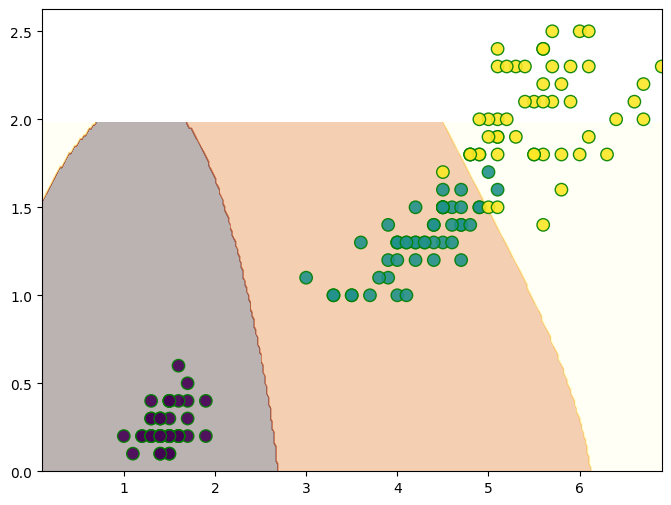

In [3]:
import matplotlib
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn as sk
import sys
import matplotlib.pyplot as plt
from sklearn import svm
from jedi.api.refactoring import inline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.base import clone
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline


df = sns.load_dataset('iris')
print(df.head())

col = ['petal_length', 'petal_width', 'species']
print(df.loc[:, col].head())                            #Selección de columnas

df.species.unique()

col = ['petal_length', 'petal_width']
X = df.loc[:, col]

speciesToNum = {
    'setosa': 0,
    'versicolor':1,
    'virginica': 2
}

df['tmp'] = df['species'].map(speciesToNum)
y = df['tmp']
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# Scale Features
sc_x= StandardScaler()

X_std_train = sc_x.fit_transform(X_train)

# Modelo de Support Vector Machines (Support vector clasification)
C = 1
clf = svm.SVC(kernel='rbf', gamma=0.7, C=C)         # Se establece el tipo de modelo de machine learning
clf.fit(X_std_train, y_train)                       # Se ajusta el modelo a los datos


#Cross Validation within Train Dataset
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print('Average Accuracy: \t {0:.4f}'.format(np.mean(res)))
print('Accuracy SD: \t\t {0:.4f}'.format(np.std(res)))

y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)


print('Precision Score: \t {0:.4f}'.format(precision_score(y_train, y_train_pred, average='weighted')))
print('Recall Score: \t\t {0: .4f}'.format(recall_score(y_train, y_train_pred, average='weighted')))
print('F1 Score: \t\t {0: .4f}'.format(f1_score(y_train, y_train_pred, average='weighted')))

#Cross Validation within Test Dataset
y_test_pred = cross_val_predict(clf, sc_x.transform(X_test), y_test, cv=3)
confusion_matrix(y_test, y_test_pred)

print('Precision Score: \t {0:.4f}'.format(precision_score(y_test, y_test_pred, average='weighted')))
print('Recall Score: \t\t {0: .4f}'.format(recall_score(y_test, y_test_pred, average='weighted')))
print('F1 Score: \t\t {0: .4f}'.format(f1_score(y_test, y_test_pred, average='weighted')))


# Grid Search
pipeline = Pipeline([('clf', svm.SVC(kernel='rbf', C=1, gamma=0.1))])           # Linea de ensamblado
params = {
    'clf__C': (0.1, 0.5, 1, 2, 5, 10, 20),
    'clf__gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)
}

svm_grid_rbf = GridSearchCV(pipeline, params, n_jobs=-1, cv=3, verbose=1, scoring='accuracy')
svm_grid_rbf.fit(X_train, y_train)

print(svm_grid_rbf.best_score_)

best = svm_grid_rbf.best_estimator_.get_params()
print(best)


for k in sorted(params.keys()):
    print('\t{0}: \t {1:.2f}'.format(k, best[k]))


y_test_pred = svm_grid_rbf.predict(X_test)
confusion_matrix(y_test, y_test_pred)

print('Precision Score: \t {0:.4f}'.format(precision_score(y_test, y_test_pred, average='weighted')))
print('Recall Score: \t\t {0: .4f}'.format(recall_score(y_test, y_test_pred, average='weighted')))
print('F1 Score: \t\t {0: .4f}'.format(f1_score(y_test, y_test_pred, average='weighted')))

Xv = X.values.reshape(-1, 1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max()
y_min, y_max = y.min(), y.max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

z = svm_grid_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8, 6))
ax = plt.contourf(xx, yy, z, cmap='afmhot', alpha=0.3)
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, alpha=0.9, edgecolors='g')
plt.show()

